In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Step 1: Data Preprocessing
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
                'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
                'hours_per_week', 'native_country', 'income']

In [11]:
df = pd.read_csv(url, names=column_names, na_values=' ?')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Drop rows with missing values
df.dropna(inplace=True)


In [5]:
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df[categorical_cols] = df[categorical_cols].apply(label_encoder.fit_transform)


In [6]:
# Step 2: Exploratory Data Analysis (EDA)
# Summary statistics
print(df.describe())

                age     workclass        fnlwgt     education  education_num  \
count  30162.000000  30162.000000  3.016200e+04  30162.000000   30162.000000   
mean      38.437902      2.199324  1.897938e+05     10.333764      10.121312   
std       13.134665      0.953925  1.056530e+05      3.812292       2.549995   
min       17.000000      0.000000  1.376900e+04      0.000000       1.000000   
25%       28.000000      2.000000  1.176272e+05      9.000000       9.000000   
50%       37.000000      2.000000  1.784250e+05     11.000000      10.000000   
75%       47.000000      2.000000  2.376285e+05     12.000000      13.000000   
max       90.000000      6.000000  1.484705e+06     15.000000      16.000000   

       marital_status    occupation  relationship          race           sex  \
count    30162.000000  30162.000000  30162.000000  30162.000000  30162.000000   
mean         2.580134      5.959850      1.418341      3.678602      0.675685   
std          1.498016      4.029566 

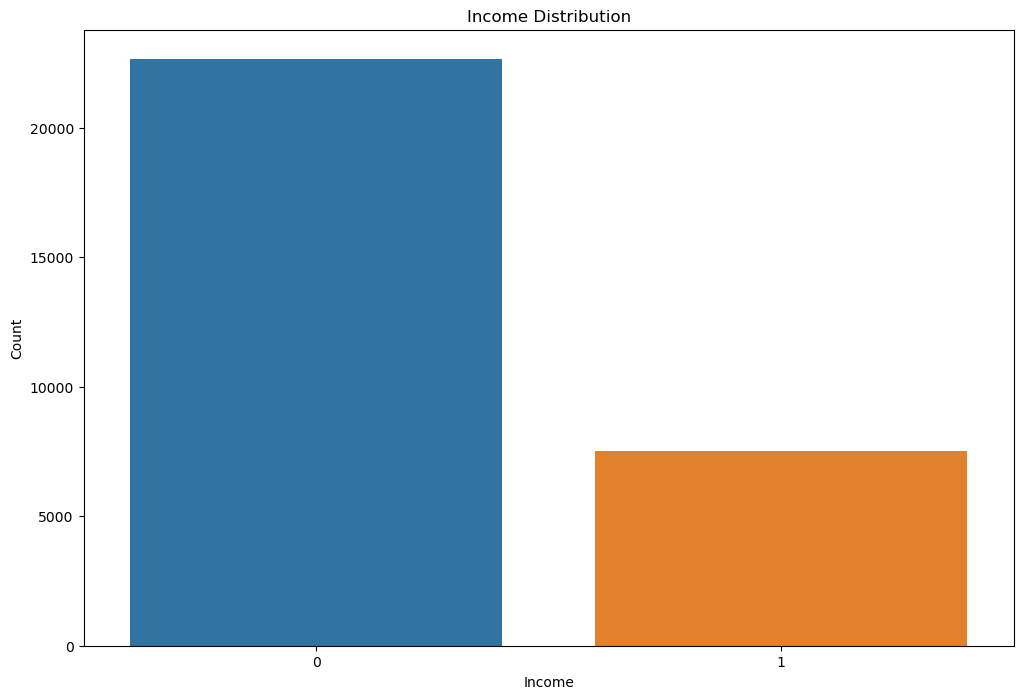

In [7]:
# Visualizations
plt.figure(figsize=(12, 8))
sns.countplot(x='income', data=df)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

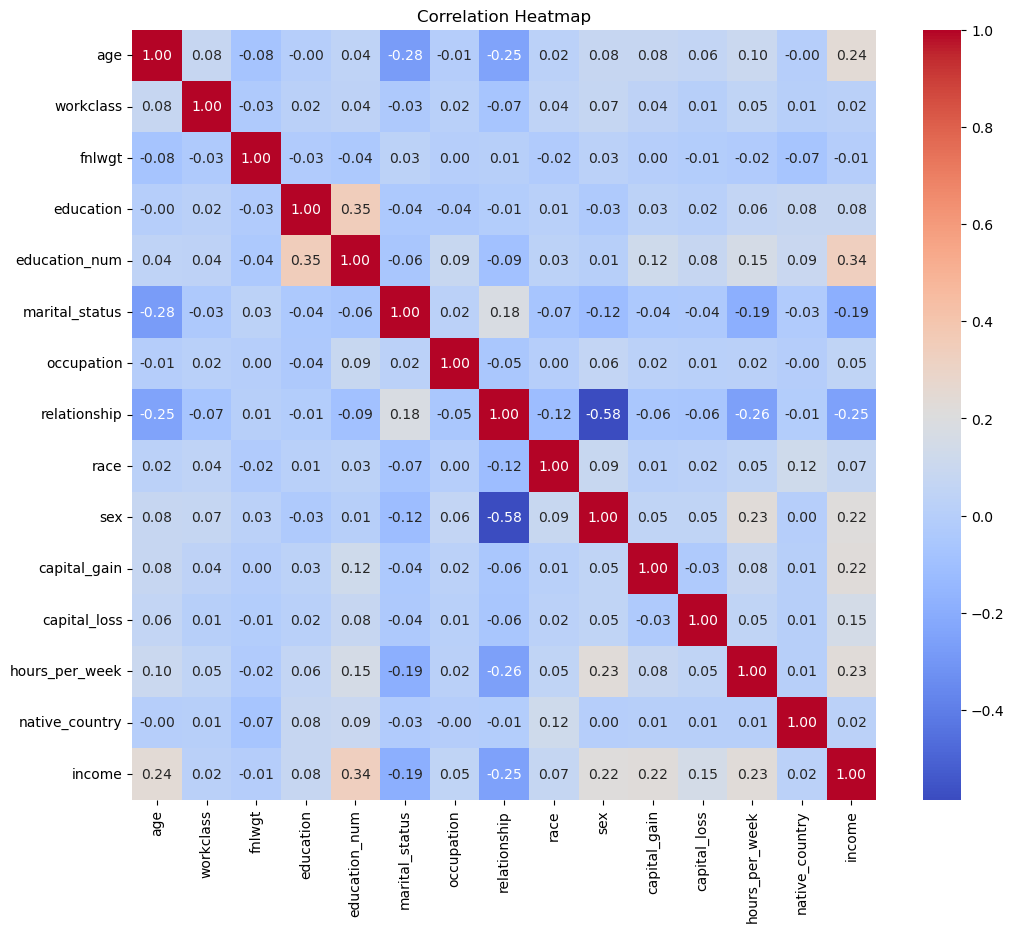

In [8]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler

# Step 3: Feature Engineering
# Check if 'capital_gain' and 'capital_loss' are present in the DataFrame
if 'capital_gain' in df.columns and 'capital_loss' in df.columns:
    # Combine 'capital_gain' and 'capital_loss' into a single feature 'net_capital'
    df['net_capital'] = df['capital_gain'] - df['capital_loss']
    df.drop(['capital_gain', 'capital_loss'], axis=1, inplace=True)
else:
    print("Columns 'capital_gain' and 'capital_loss' are not present in the DataFrame.")

# Scale numerical features using StandardScaler
numerical_cols = ['age', 'fnlwgt', 'education_num', 'hours_per_week', 'net_capital']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'])

In [13]:
# Step 4: Split the dataset into features and target variable
X = df.drop('income', axis=1)
y = df['income']

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Step 6: Choose various machine learning algorithms
model = RandomForestClassifier(random_state=42)

In [15]:
# Step 7: Train the models on the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Step 8: Evaluate the models' performance
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8598188238906802
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      4942
        >50K       0.74      0.64      0.69      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.78      0.80      6513
weighted avg       0.85      0.86      0.86      6513

